In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from oneD.oneD_galerkin import *

In [2]:
elems = elem_indices(3, 3)
print(elems)

[[0 1 2 3]
 [3 4 5 6]
 [6 7 8 9]]


In [3]:
elems[0]

array([0, 1, 2, 3])

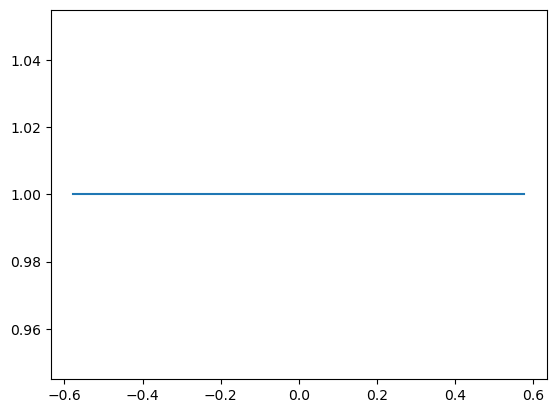

[-0.57735027  0.57735027]


In [4]:
nodes, weights = np.polynomial.legendre.leggauss(2)
plt.plot(nodes, weights)
plt.show()
print(nodes)

In [5]:
p1 = np.polynomial.Polynomial((0, -0.5, 0.5))
p1

Polynomial([ 0. , -0.5,  0.5], domain=[-1,  1], window=[-1,  1], symbol='x')

In [6]:
p1(0)

0.0

In [7]:
p1.domain = np.array([0, 5])
p1(2.5)

0.0

In [62]:
b = local_basis(1)
b

(Polynomial([ 1., -1.], domain=[0., 1.], window=[0., 1.], symbol='x'),
 Polynomial([0., 1.], domain=[0., 1.], window=[0., 1.], symbol='x'))

In [37]:
leggauss_nodes, leggauss_weights = np.polynomial.legendre.leggauss(1)
np.array([leggauss_weights * p(leggauss_nodes) for p in b])

array([[2.],
       [0.]])

In [32]:
int_factors = np.array([leggauss_weights * p(leggauss_nodes) for p in b])
int_factors

array([[2.],
       [0.]])

In [34]:
n_elem = 10
polydeg = 1

x_start = 0
x_end = 1
elems = elem_indices(n_elem, polydeg)
print(elems)

nodes = n_elem * polydeg + 1
x_coords = np.linspace(x_start, x_end, nodes)

end_points = np.append(x_coords[elems[:, 0]], x_coords[-1])
end_points

[[ 0  1]
 [ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]]


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [35]:
transformed_nodes = (np.array((0.5*np.array([np.diff(end_points)])).T @ [leggauss_nodes + 1]) + end_points[:-1][:, np.newaxis])
transformed_nodes

array([[0.05],
       [0.15],
       [0.25],
       [0.35],
       [0.45],
       [0.55],
       [0.65],
       [0.75],
       [0.85],
       [0.95]])

In [13]:
source_component = np.diff(end_points)[:, np.newaxis] * TestParams.source(transformed_nodes)
source_component

array([[ 1.75747393,  6.01113089],
       [ 8.0771654 ,  8.8239821 ],
       [ 7.73780348,  4.3620822 ],
       [ 1.01916814, -3.69604693],
       [-6.53969947, -8.70704595],
       [-8.70704595, -6.53969947],
       [-3.69604693,  1.01916814],
       [ 4.3620822 ,  7.73780348],
       [ 8.8239821 ,  8.0771654 ],
       [ 6.01113089,  1.75747393]])

In [14]:
print(source_component @ int_factors.T)

[[  0.06684247   5.17906988   2.52269246]
 [  2.6012705   11.26743166   3.03244533]
 [  2.99113441   8.06659045   1.04216082]
 [  0.91501888  -1.78458586  -1.80731181]
 [ -1.9154652  -10.16449695  -3.16678327]
 [ -3.16678327 -10.16449695  -1.9154652 ]
 [ -1.80731181  -1.78458586   0.91501888]
 [  1.04216082   8.06659045   2.99113441]
 [  3.03244533  11.26743166   2.6012705 ]
 [  2.52269246   5.17906988   0.06684247]]


In [22]:
source_component = prep_gauss_quadrature(TestParams.source, end_points, leggauss_nodes)
integral_matrix = source_component @ int_factors.T
print(source_component)

print(accumulate_by_index(integral_matrix, elems))

[[ 1.75747393  6.01113089]
 [ 8.0771654   8.8239821 ]
 [ 7.73780348  4.3620822 ]
 [ 1.01916814 -3.69604693]
 [-6.53969947 -8.70704595]
 [-8.70704595 -6.53969947]
 [-3.69604693  1.01916814]
 [ 4.3620822   7.73780348]
 [ 8.8239821   8.0771654 ]
 [ 6.01113089  1.75747393]]
[  0.06684247   5.17906988   5.12396297  11.26743166   6.02357973
   8.06659045   1.9571797   -1.78458586  -3.72277701 -10.16449695
  -6.33356654 -10.16449695  -3.72277701  -1.78458586   1.9571797
   8.06659045   6.02357973  11.26743166   5.12396297   5.17906988
   0.06684247]


In [15]:
print(elems)

[[ 0  1  2]
 [ 2  3  4]
 [ 4  5  6]
 [ 6  7  8]
 [ 8  9 10]
 [10 11 12]
 [12 13 14]
 [14 15 16]
 [16 17 18]
 [18 19 20]]


In [16]:
# Your example A:
A = np.array([
    [ 0.06684247,   5.17906988,   2.52269246],
    [ 2.6012705 ,  11.26743166,   3.03244533],
    [ 2.99113441,   8.06659045,   1.04216082],
    [ 0.91501888,  -1.78458586,  -1.80731181],
    [-1.9154652 , -10.16449695,  -3.16678327],
    [-6.33356654, -20.32899389,  -3.8309304 ],
    [-3.61462362,  -3.56917172,   1.83003776],
    [ 2.08432164,  16.1331809 ,   5.98226881],
    [ 6.06489065,  22.53486333,   5.20254101],
    [ 5.04538493,  10.35813975,   0.13368495]
])

# And the indices mapping array you provided:
indices = np.array([
    [ 0,  1,  2],
    [ 2,  3,  4],
    [ 4,  5,  6],
    [ 6,  7,  8],
    [ 8,  9, 10],
    [10, 11, 12],
    [12, 13, 14],
    [14, 15, 16],
    [16, 17, 18],
    [18, 19, 20]
])

# Flatten indices and data arrays:
flat_indices = indices.ravel()
print(flat_indices)
flat_values = A.ravel()
print(flat_values)
print('___')
print()

# Compute the accumulation using np.bincount:
result_length = flat_indices.max() + 1
result = np.bincount(flat_indices, weights=flat_values, minlength=result_length)

print(result)

[ 0  1  2  2  3  4  4  5  6  6  7  8  8  9 10 10 11 12 12 13 14 14 15 16
 16 17 18 18 19 20]
[  0.06684247   5.17906988   2.52269246   2.6012705   11.26743166
   3.03244533   2.99113441   8.06659045   1.04216082   0.91501888
  -1.78458586  -1.80731181  -1.9154652  -10.16449695  -3.16678327
  -6.33356654 -20.32899389  -3.8309304   -3.61462362  -3.56917172
   1.83003776   2.08432164  16.1331809    5.98226881   6.06489065
  22.53486333   5.20254101   5.04538493  10.35813975   0.13368495]
___

[  0.06684247   5.17906988   5.12396296  11.26743166   6.02357974
   8.06659045   1.9571797   -1.78458586  -3.72277701 -10.16449695
  -9.50034981 -20.32899389  -7.44555402  -3.56917172   3.9143594
  16.1331809   12.04715946  22.53486333  10.24792594  10.35813975
   0.13368495]


In [87]:
p0, p1 = local_basis(1)
print(p1(0))
print(p1.deriv()(0))
print('\n')
p1.domain = np.array([-1, 1])
print(p1(0))
print(p1.deriv()(0))

0.0
1.0


0.5
0.5


In [86]:

vec = np.array([0, 1])

# Generate all unique pairs (i,j) with i <= j
i_indices, j_indices = np.triu_indices(len(vec))

print(np.triu_indices(2))

# Stack pairs into a matrix
pairs = np.column_stack((vec[i_indices], vec[j_indices]))

print(pairs)

(array([0, 0, 1]), array([0, 1, 1]))
[[0 0]
 [0 1]
 [1 1]]
